(0.0, 2.0, 0.0, 15.0)

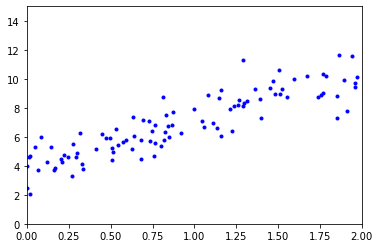

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from IPython import display

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.88925727],
       [3.27733235]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 3.88925727],
       [10.44392197]])

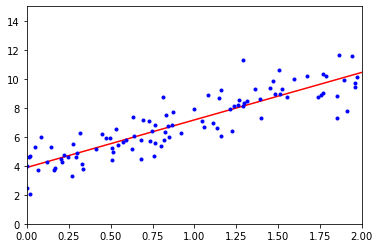

In [4]:
plt.plot(X_new,y_pred,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ # (array([4.15725481]), array([[2.97840411]]))
lin_reg.predict(X_new)

array([[ 3.88925727],
       [10.44392197]])

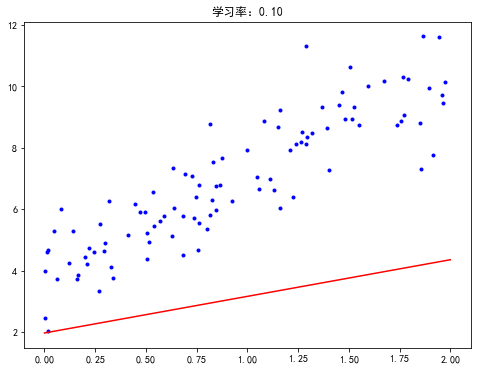

AttributeError: 'function' object has no attribute 'clear_output'

In [6]:
eta = 0.1 # 学习率
n_iter = 1000
m = 100
theta = np.random.randn(2,1)

plt.figure(figsize=(8,6))
plt.ion()# 打开交互模式
plt.axis([0,2,0,15])
plt.rcParams["font.sans-serif"] = "SimHei"

for iter in range(n_iter):
    plt.cla() # 清除原图像
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_pred = X_new_b.dot(theta)
    plt.plot(X,y,"b.")
    plt.plot(X_new,y_pred,"r-")
    plt.title("学习率：{:.2f}".format(eta))
    plt.pause(0.1) # 暂停一会
    display.clear_output(wait=True)# 刷新图像
plt.ioff()# 关闭交互模式    
plt.show()
theta

In [7]:
from sklearn.linear_model import SGDRegressor
# help(SGDRegressor)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.95154081]), array([3.3205097]))

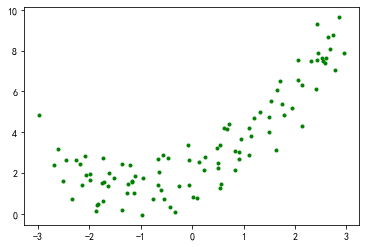

In [8]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.rcParams["axes.unicode_minus"] = False
plt.plot(X, y, "g.")

In [12]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
# help(PolynomialFeatures)
X_ploy = pf.fit_transform(X)
print(X[0])
print(X_ploy[0])

[2.43507761]
[2.43507761 5.92960298]


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95147614]), array([[1.0462516 , 0.48003845]]))

(500,)


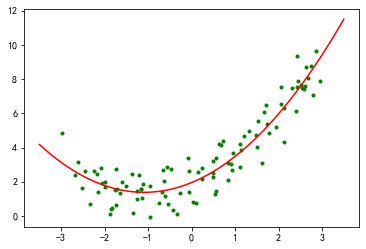

In [49]:
plt.plot(X, y, "g.")
x = np.linspace(-3.5, 3.5, 500)
print(x.shape)
y_pred = lin_reg.intercept_ + lin_reg.coef_[0][0]*x + lin_reg.coef_[0][1]*x**2
plt.plot(x, y_pred, 'r-')

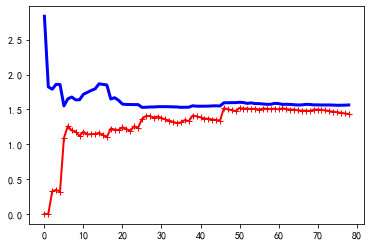

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

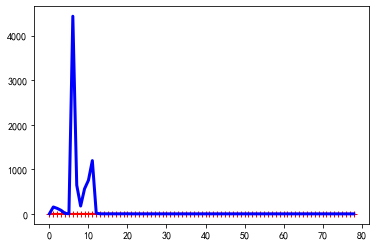

In [112]:
from sklearn.pipeline import Pipeline
ploy_reg = Pipeline((
    ("ploy_feature",PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg",LinearRegression()),
))
plot_learning_curves(ploy_reg, X, y)

In [115]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]) # array([[5.04581676]])

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])  # array([5.00189893])

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]]) # array([4.99822842])

array([4.99822842])